In [64]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
from typing import List

In [65]:
def get_random_frame(path):
    
	vidcap = cv.VideoCapture(path)
 
	# Get total number of frames
	totalFrames = vidcap.get(cv.CAP_PROP_FRAME_COUNT)
	randomFrameNumber = random.randint(0, totalFrames)
 
	# Set frame position
	vidcap.set(cv.CAP_PROP_POS_FRAMES,randomFrameNumber)
	success, image = vidcap.read()
 
	return image.astype(np.uint8) if success else None

In [66]:
def find_and_draw_markers(frame):
	pass

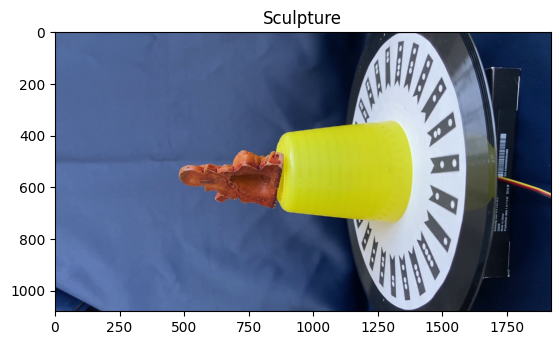

In [67]:
sculpture = cv.cvtColor(get_random_frame('../data/obj04.mp4'), cv.COLOR_BGR2RGB)

plt.title("Sculpture")
plt.imshow(sculpture)

In [68]:
ret, thresh = cv.threshold(cv.cvtColor(sculpture[:,900:1650], cv.COLOR_RGB2GRAY), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)


contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:",len(contours))
#print(hierarchy)

Number of contours detected: 87


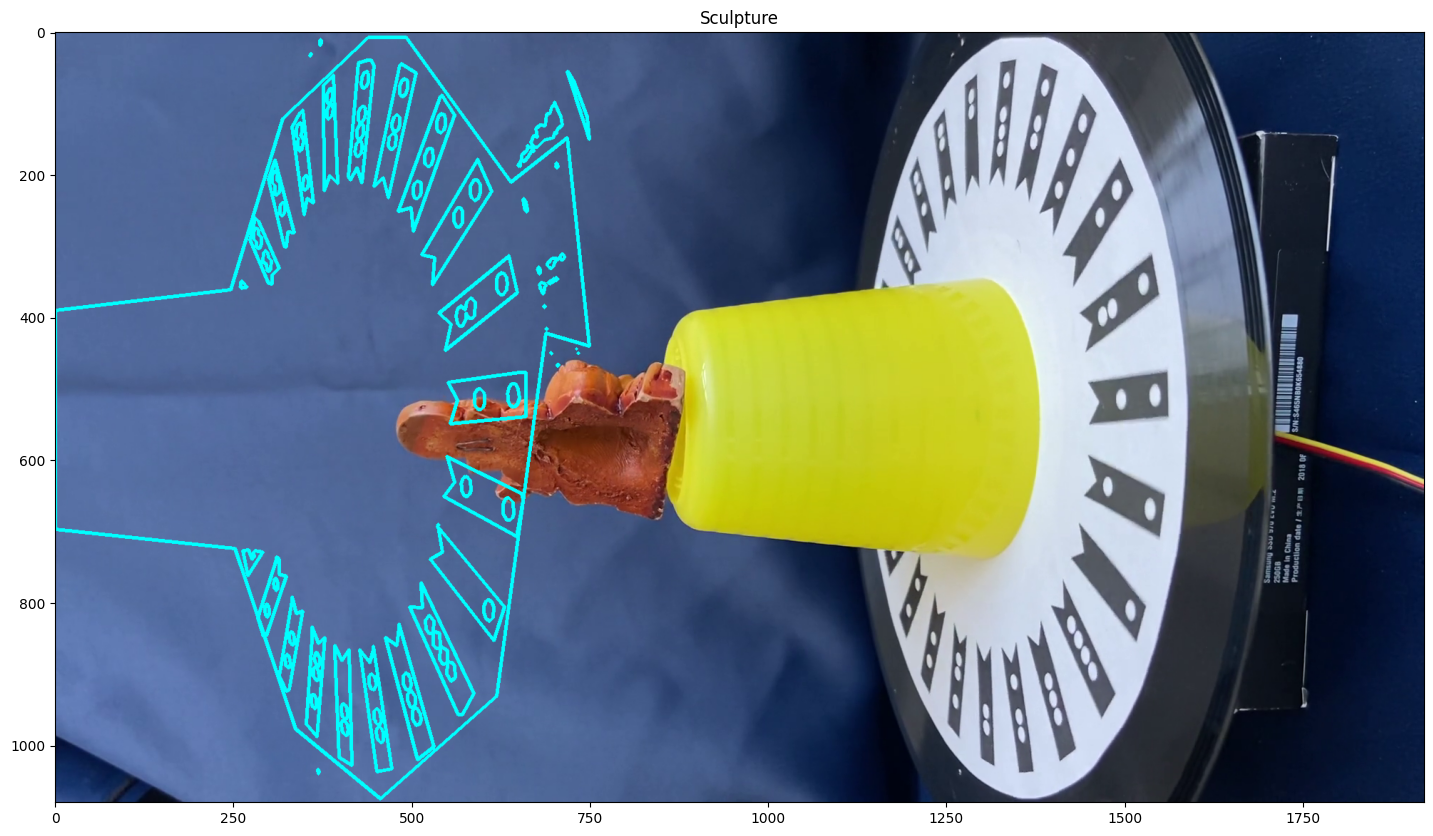

In [69]:
test_contourns = []

for cnt in contours:
    #print(cnt)
    eps = 0.01*cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, eps, False)
    
    cv.drawContours(sculpture, [approx], -1, (0,255,255), 3)
    #cv.drawContours(sculpture, [approx], -1, (0,0,255), 3)

plt.figure(figsize=(25,10))
plt.title("Sculpture")
plt.imshow(sculpture)

In [70]:
'''obj = 'obj4.mp4'

input_video = cv.VideoCapture(f"../data/{obj}")

# Get video properties
frame_width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = input_video.get(cv.CAP_PROP_FPS)

# Create output video writer
#output_video = cv.VideoWriter(f"../output_part1/{obj.split('.')[0]}_mask.mp4", cv.VideoWriter_fourcc(*"mp4v"), fps, (frame_width, frame_height))
  
while True:
      
	# Extract a frame
	ret, frame = input_video.read()

	if not ret:	break

	# Apply the segmentation
	marked_frame = find_and_draw_markers(frame)
   
	cv.imshow(marked_frame, f'{obj} markers')
   
	if cv.waitKey(1) == ord('q'):
		break
			
			
input_video.release()
#output_video.release()
cv.destroyAllWindows()'''

'obj = \'obj4.mp4\'\n\ninput_video = cv.VideoCapture(f"../data/{obj}")\n\n# Get video properties\nframe_width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))\nframe_height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))\nfps = input_video.get(cv.CAP_PROP_FPS)\n\n# Create output video writer\n#output_video = cv.VideoWriter(f"../output_part1/{obj.split(\'.\')[0]}_mask.mp4", cv.VideoWriter_fourcc(*"mp4v"), fps, (frame_width, frame_height))\n  \nwhile True:\n      \n\t# Extract a frame\n\tret, frame = input_video.read()\n\n\tif not ret:\tbreak\n\n\t# Apply the segmentation\n\tmarked_frame = find_and_draw_markers(frame)\n   \n\tcv.imshow(marked_frame, f\'{obj} markers\')\n   \n\tif cv.waitKey(1) == ord(\'q\'):\n\t\tbreak\n\t\t\t\n\t\t\t\ninput_video.release()\n#output_video.release()\ncv.destroyAllWindows()'

: 